<a href="https://colab.research.google.com/github/RJL08/Sistemas-de-aprendizaje-autm-tico/blob/main/RandomForest_Fraude_CreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vamos a aprender a usar random forest usado para entornos medicos y finanzas
# Usamos el dataset creditcar.csv el cual esta desbalanceado

In [1]:
# imports necesarios
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



In [2]:
# cargamos el dataset
df = pd.read_csv('sample_data/creditcard.csv')


In [3]:
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47627 entries, 0 to 47626
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    47627 non-null  int64  
 1   V1      47627 non-null  float64
 2   V2      47627 non-null  float64
 3   V3      47627 non-null  float64
 4   V4      47627 non-null  float64
 5   V5      47627 non-null  float64
 6   V6      47627 non-null  float64
 7   V7      47627 non-null  float64
 8   V8      47627 non-null  float64
 9   V9      47627 non-null  float64
 10  V10     47627 non-null  float64
 11  V11     47627 non-null  float64
 12  V12     47627 non-null  float64
 13  V13     47627 non-null  float64
 14  V14     47627 non-null  float64
 15  V15     47627 non-null  float64
 16  V16     47627 non-null  float64
 17  V17     47627 non-null  float64
 18  V18     47627 non-null  float64
 19  V19     47627 non-null  float64
 20  V20     47627 non-null  float64
 21  V21     47627 non-null  float64
 22  V22

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,...,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000
mean,28182.806538,-0.240732,0.021474,0.694689,0.191060,-0.249825,0.102321,-0.119863,0.053449,0.141195,...,-0.027059,-0.107091,-0.039399,0.007890,0.136314,0.022561,0.004907,0.004021,91.777163,0.003065
std,13001.674731,1.884803,1.626534,1.519910,1.402208,1.412866,1.309942,1.282115,1.216943,1.214115,...,0.737251,0.637200,0.579666,0.594175,0.438367,0.502411,0.388191,0.335275,249.818013,0.055283
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,20517.000000,-0.990013,-0.548687,0.220591,-0.714465,-0.857321,-0.636477,-0.602244,-0.146951,-0.597979,...,-0.231991,-0.528167,-0.179247,-0.322459,-0.128057,-0.329467,-0.063838,-0.006862,7.590000,0.000000
50%,32929.000000,-0.248836,0.085546,0.800268,0.195057,-0.282233,-0.151974,-0.074940,0.057085,0.026136,...,-0.069134,-0.081945,-0.051439,0.061661,0.175871,-0.068195,0.008665,0.021873,24.990000,0.000000
75%,38235.500000,1.156440,0.736947,1.432177,1.070586,0.286643,0.492730,0.425897,0.329624,0.837289,...,0.107256,0.306116,0.078475,0.401231,0.421741,0.302743,0.083933,0.076168,83.110000,0.000000
max,43282.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [6]:
# busacr valores nulos
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
# con esto vemos el balanceo del csv
df.value_counts(df['Class'])

,count
Class,
0.0,47481
1.0,146


<Axes: xlabel='Class'>

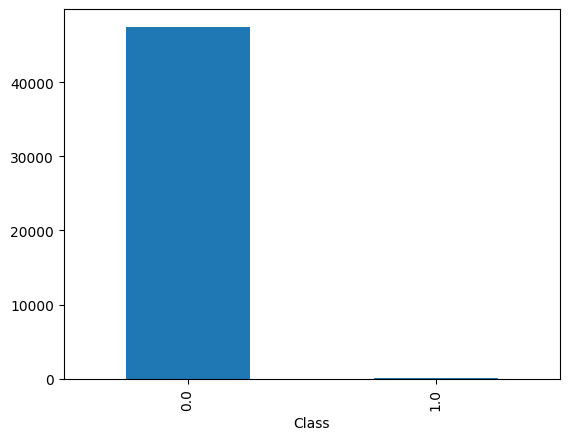

In [8]:
# representacion de los valores ( columna objetivo Class)
df.value_counts(df['Class']).plot.bar()

In [9]:
# random forest
X= pd.DataFrame(df.drop(['Class'], axis=1))
y= pd.DataFrame(df['Class'])

In [10]:
# dividir entre train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# random forest
# creamos el modelo
modelo = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42, verbose=2, max_features='sqrt')
# entrenamos el modelo
modelo.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    9.9s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.6s finished


RandomForestClassifier(random_state=42, verbose=2)

In [12]:
# realizamos la prediccion
pred_y= modelo.predict(X_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [13]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred_y))
print(classification_report(y_test, pred_y))

[[9500    0]
 [   3   23]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9500
         1.0       1.00      0.88      0.94        26

    accuracy                           1.00      9526
   macro avg       1.00      0.94      0.97      9526
weighted avg       1.00      1.00      1.00      9526



In [14]:
# mejora en el random forest
# variamos los hiperparametros
modelo=RandomForestClassifier(n_estimators=100, class_weight='balanced', max_features='sqrt', random_state=42, max_depth=6
                              , oob_score=True, verbose=2)
modelo.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    4.5s


building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.0s finished


RandomForestClassifier(class_weight='balanced', max_depth=6, oob_score=True,
                       random_state=42, verbose=2)

In [15]:
# predecimos
pred_y= modelo.predict(X_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [16]:
# matriz de confuxion
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred_y))
print(classification_report(y_test, pred_y))

[[9493    7]
 [   2   24]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9500
         1.0       0.77      0.92      0.84        26

    accuracy                           1.00      9526
   macro avg       0.89      0.96      0.92      9526
weighted avg       1.00      1.00      1.00      9526



# CrossValidation

In [17]:
# definimos una tabla con los valores de los parametros
param_grid={
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [6, 8]

}

In [18]:
# creamos el buscador de mejores hiperparametros
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=modelo, param_grid=param_grid,
                          cv=5,
                          scoring='f1',
                          verbose=2,
                          n_jobs=-1

                          )

grid.fit( X_train, y_train)
print("Mejores parametros", grid.best_params_)
print("Mejor score", grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.8s


building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.6s finished


Mejores parametros {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}
Mejor score 0.8293570391872278


In [19]:
# modelo
modelo = RandomForestClassifier(n_estimators=100, verbose=2, max_features='sqrt', max_depth=8)
modelo.fit(X_train, y_train)
pre_y = modelo.predict(X_test)
print(confusion_matrix(y_test, pre_y))
print(classification_report(y_test, pre_y))
print("Mejor score", grid.best_score_)

building tree 1 of 100
building tree 2 of 100


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    7.0s


building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   17.8s finished
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [20]:
# crossvalidations
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(random_state=42)
# validacion cruzada
scores = cross_val_score(modelo,X_train,y_train,cv=5, scoring= 'f1')
print(scores)


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[0.86956522 0.85106383 0.91304348 0.93617021 0.95652174]


In [21]:
# para ver los parametros con los que se ha realizado
modelo.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [22]:
# entrenamos y hacemos la matriz de confusion
modelo.fit(X_train, y_train)
pre_y = modelo.predict(X_test)
print(confusion_matrix(y_test, pre_y))
print(classification_report(y_test, pre_y))

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[[9500    0]
 [   3   23]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9500
         1.0       1.00      0.88      0.94        26

    accuracy                           1.00      9526
   macro avg       1.00      0.94      0.97      9526
weighted avg       1.00      1.00      1.00      9526



# Random search validation

In [23]:
# random search validation
from sklearn.model_selection import RandomizedSearchCV
# definimos los parametros
pram_grid={
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [6, 8 , 10]

}

# Afinacion de hiperparametros
rs = RandomizedSearchCV(estimator=modelo, param_distributions=pram_grid,
                          cv=5,
                          scoring='f1',
                          verbose=2,
                          n_jobs=-1

                          )

rs.fit( X_train, y_train)
print("Mejores parametros", rs.best_params_)
print("Mejor score", rs.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mejores parametros {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 10}
Mejor score 0.9093432007400555


In [24]:
# entrenar el modelos con lo0s parametros obteneidos
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(**rs.best_params_)
# entrenamos
modelo.fit(X_train, y_train)
pre_y = modelo.predict(X_test)
print(confusion_matrix(y_test, pre_y))
print(classification_report(y_test, pre_y))
print(modelo.score(X_test, y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[[9500    0]
 [   3   23]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9500
         1.0       1.00      0.88      0.94        26

    accuracy                           1.00      9526
   macro avg       1.00      0.94      0.97      9526
weighted avg       1.00      1.00      1.00      9526

0.9996850724333404
